In [1]:
import xarray as xr

import sys 
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef
import functions.data_wrangling as data 
import functions.plotting as plot

In [2]:
ds1 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/jra55_uvtw.nc',
                            parallel=True, chunks={'time': 31})
ds1 

<xarray.Dataset>
Dimensions:  (time: 21550, level: 37, lat: 73, lon: 144)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    u        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    v        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(31, 37, 73, 144), meta=np.ndarray>

TypeError: Input z must be 2D, not 3D

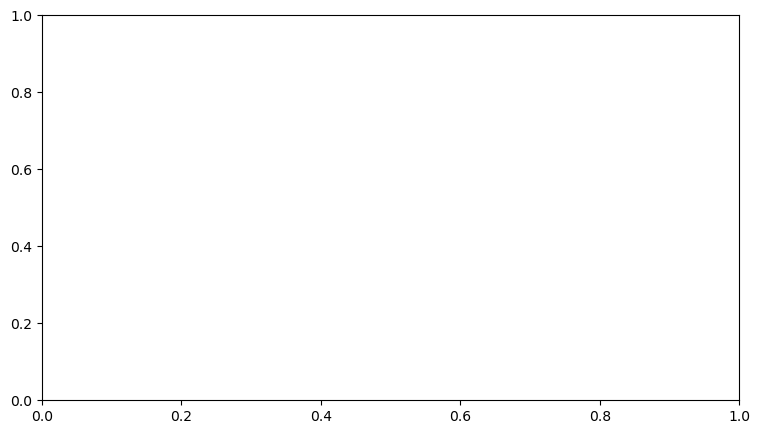

In [3]:
plot.plot_ubar_epflux(ds1)

In [63]:
ds2 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/jra55_efp_qg.nc',
                            parallel=True, chunks={'time': 31})

ds2 = ds2.rename({'div1': 'div1_qg'}) 
ds2 

<xarray.Dataset>
Dimensions:  (time: 21550, level: 37, lat: 73)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    ubar     (time, level, lat) float32 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div1_qg  (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>

In [64]:
ds = xr.Dataset(data_vars={'ubar': ds1.ubar, 'div1_pr': ds1.div1_pr, 'div1_qg': ds2.div1_qg})
ds 

<xarray.Dataset>
Dimensions:  (time: 21550, lat: 73, level: 37)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    ubar     (time, level, lat) float32 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div1_pr  (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>
    div1_qg  (time, level, lat) float64 dask.array<chunksize=(31, 37, 73), meta=np.ndarray>

In [65]:
# ds.to_netcdf('/home/links/ct715/data_storage/reanalysis/jra55_daily/jra55_ubar_epf_both.nc') 